    x       Точное        Эйлер    Погреш.          РК2    Погреш.        Адамс    Погреш.
 0.70     1.602892     1.602892   0.00e+00     1.602892   0.00e+00     1.602892   0.00e+00
 0.80     1.773085     1.829830   5.67e-02     1.844777   7.17e-02     1.844777   7.17e-02
 0.90     1.956720     2.117568   1.61e-01     2.152112   1.95e-01     2.164709   2.08e-01
 1.00     2.155239     2.479887   3.25e-01     2.540367   3.85e-01     2.570085   4.15e-01
 1.10     2.370278     2.934365   5.64e-01     3.029399   6.59e-01     3.082050   7.12e-01
 1.20     2.603694     3.503435   9.00e-01     3.644732   1.04e+00     3.728274   1.12e+00
 1.30     2.857575     4.215781   1.36e+00     4.419264   1.56e+00     4.544608   1.69e+00
 1.40     3.134275     5.108172   1.97e+00     5.395528   2.26e+00     5.577650   2.44e+00
 1.50     3.436431     6.227864   2.79e+00     6.628709   3.19e+00     6.888210   3.45e+00
 1.60     3.766995     7.635804   3.87e+00     8.190696   4.42e+00     8.555989   4.79e+00

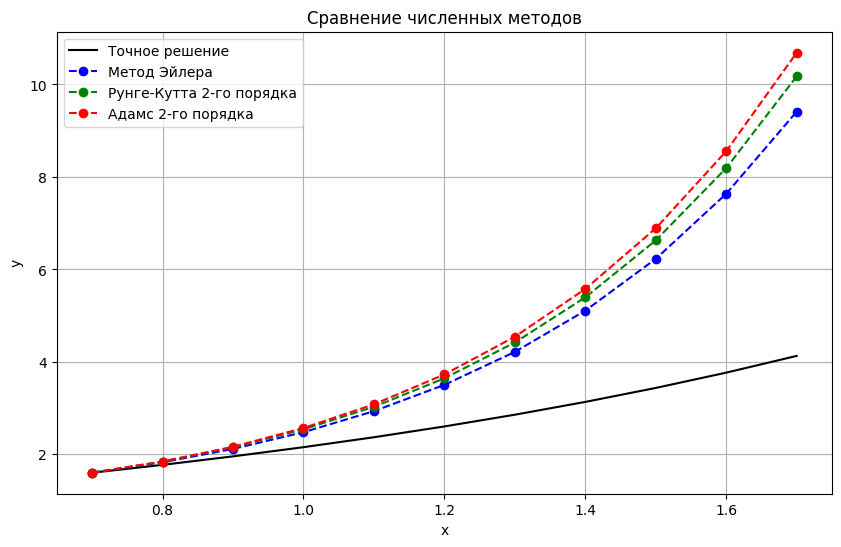

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Правая часть дифференциального уравнения
def f(x, y):
    return y * x + x * (0.7 * np.exp(x) + 0.3 * np.cos(x))

# Точное решение
def exact_solution(x):
    return 0.7 * np.exp(x) + 0.3 * np.sin(x)

# Начальные условия
x0 = 0.7
x_end = 1.7
y0 = exact_solution(x0)  # по условию

# Сетка
n = 10
h = (x_end - x0) / n
x = np.linspace(x0, x_end, n+1)

# Метод Эйлера
y_euler = np.zeros(n+1)
y_euler[0] = y0
for i in range(n):
    y_euler[i+1] = y_euler[i] + h * f(x[i], y_euler[i])

# Метод Рунге-Кутты 2-го порядка (β = 3/4)
beta = 3/4
alpha = 1 / (2 * beta)
y_rk2 = np.zeros(n+1)
y_rk2[0] = y0
for i in range(n):
    k1 = f(x[i], y_rk2[i])
    k2 = f(x[i] + beta*h, y_rk2[i] + beta*h*k1)
    y_rk2[i+1] = y_rk2[i] + h * (alpha * k1 + (1 - alpha) * k2)

# Метод Адамса–Башфорта 2-го порядка (нужны первые два значения, используем РК2)
y_adams = np.zeros(n+1)
y_adams[0] = y0
# Второе значение из РК2
k1 = f(x[0], y_adams[0])
k2 = f(x[0] + beta*h, y_adams[0] + beta*h*k1)
y_adams[1] = y_adams[0] + h * (alpha * k1 + (1 - alpha) * k2)
for i in range(1, n):
    y_adams[i+1] = y_adams[i] + h/2 * (3 * f(x[i], y_adams[i]) - f(x[i-1], y_adams[i-1]))

# Точное решение
y_exact = exact_solution(x)

# Погрешности
err_euler = np.abs(y_exact - y_euler)
err_rk2 = np.abs(y_exact - y_rk2)
err_adams = np.abs(y_exact - y_adams)

# Таблица результатов
print(f"{'x':>5} {'Точное':>12} {'Эйлер':>12} {'Погреш.':>10} {'РК2':>12} {'Погреш.':>10} {'Адамс':>12} {'Погреш.':>10}")
for i in range(n+1):
    print(f"{x[i]:5.2f} {y_exact[i]:12.6f} {y_euler[i]:12.6f} {err_euler[i]:10.2e} {y_rk2[i]:12.6f} {err_rk2[i]:10.2e} {y_adams[i]:12.6f} {err_adams[i]:10.2e}")

# График
plt.figure(figsize=(10,6))
plt.plot(x, y_exact, 'k-', label='Точное решение')
plt.plot(x, y_euler, 'bo--', label='Метод Эйлера')
plt.plot(x, y_rk2, 'go--', label='Рунге-Кутта 2-го порядка')
plt.plot(x, y_adams, 'ro--', label='Адамс 2-го порядка')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Сравнение численных методов')
plt.grid(True)
plt.show()
